linearRegression에서는 예측 가능하지 않은 데이터셋이 나오면 선의 기울기가 너무 증가해서 분류를 할때 문제가 생김

logistic regression은 이 문제를 해결하고자 기존의 가설함수인 g(theta) = X.dot(theta)를 h(theta) = 1/( 1 + e ** (1 - g(theta))) 로 두어 가설함수의 아웃풋을 0과 1사이로 좁힌다음 0.5이상이면 통과 미만이면 실패로 분류해준다. 

로지스틱 회귀의 가설 함수 

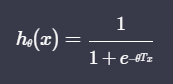

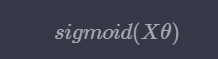

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(x))

def prediction(X, theta):
    return sigmoid(X @ theta)

로지스틱 회귀의 손실 함수: cross-entropy

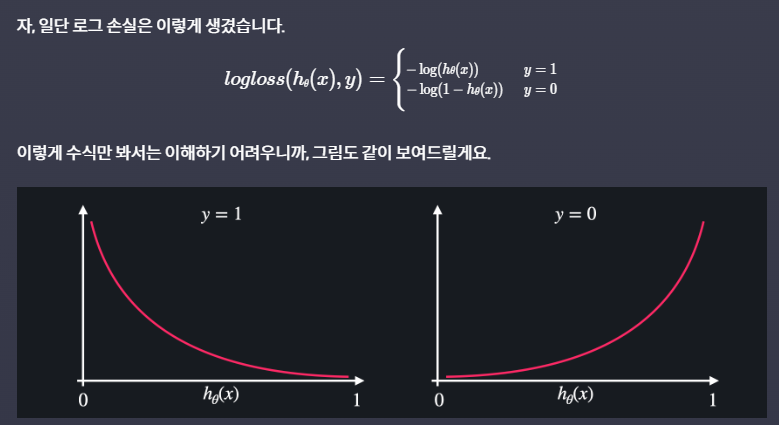

로지스틱 회귀 손실함수 

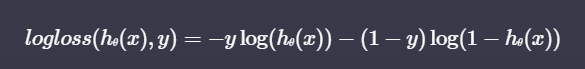

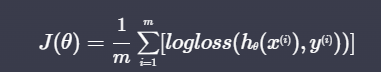

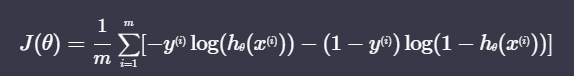

로지스틱 회귀 경사하강법

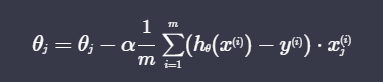

구현
->h(x) = sigmoid(X@theta)

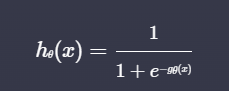

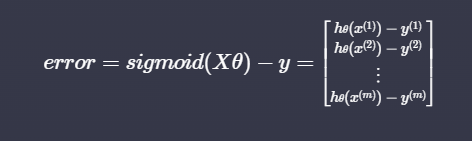

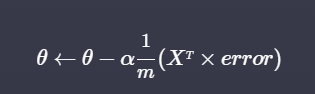

In [ ]:
def gradient_descent(X,theta, y,iterations,alpha):
    m = len(X)
    for _ in range(iterations):
        error = prediction(X, theta) - y
        theta = theta - alpha/m * (X.T @ error)
    return theta

In [4]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def prediction(X,theta):
    return sigmoid(X @ theta)

def gradient_descent(X,theta, y,iterations, alpha):
    m = len(X)

    for _ in range(iterations):
        error = prediction(X,theta) - y 
        theta = theta - alpha/m * (X.T @ error)
    return theta

hours_studied = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])  # 공부 시간 (단위: 100시간)
gpa_rank = np.array([0.9, 0.95, 0.8, 0.82, 0.7, 0.6, 0.55, 0.67, 0.4, 0.3, 0.2, 0.2, 0.15, 0.18, 0.15, 0.05]) # 학년 내신 (백분률)
number_of_tries = np.array([1, 2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 2, 4, 1, 2])  # 시험 응시 횟수

# 목표 변수
passed = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])  # 시험 통과 여부 (0: 탈락, 1:통과)

# 설계 행렬 X 정의
X = np.array([
    np.ones(16),
    hours_studied,
    gpa_rank,
    number_of_tries
]).T

# 입력 변수 y 정의
y = passed

theta = [0, 0, 0, 0]  # 파라미터 초기값 설정 -> theta 가 4개인 이유는 features(hours_studied,gpa_rank,number_of_tries ) 3개와 theta0
theta = gradient_descent(X, theta, y, 300, 0.1)  # 경사 하강법을 사용해서 최적의 파라미터를 찾는다
theta

array([-1.35280508,  1.61640725, -1.83666046, -0.60286277])